# EDA

** NB: ** Set the argument `output_image` of the plotting functions to `False` when running the notebook to have interactive plots (some have a dropdown that allows to choose the province/region)

In [1]:
import pandas as pd
import numpy as np

from IPython.core.display import HTML

from pathlib import Path

import os, sys
sys.path.insert(0, os.path.abspath('../src'))

from utils import *
from plots import *

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, dpc_province_df, pop_prov_df, prov_list_df = load_data(data_path)

In [5]:
covidpro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28210 entries, 0 to 28209
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_prov         28210 non-null  int64         
 1   Province        28210 non-null  object        
 2   Date            28210 non-null  datetime64[ns]
 3   Deaths          28210 non-null  int64         
 4   Tot_deaths      28210 non-null  int64         
 5   New_cases       28210 non-null  int64         
 6   Curr_pos_cases  28210 non-null  int64         
 7   Region          28210 non-null  object        
 8   id_reg          28210 non-null  int64         
 9   NP_R            28210 non-null  float64       
 10  DR              28210 non-null  float64       
 11  NP_R_Rolling    28210 non-null  float64       
 12  DR_Rolling      28210 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 2.8+ MB


In [6]:
covidpro_df.head()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
0,84,Agrigento,2020-02-24,0,0,0,0,Sicilia,19,0.0,0.0,0.0,0.0
1,6,Alessandria,2020-02-24,0,0,0,0,Piemonte,1,0.0,0.0,0.0,0.0
2,42,Ancona,2020-02-24,0,0,0,0,Marche,11,0.0,0.0,0.0,0.0
3,7,Aosta,2020-02-24,0,0,0,0,Valle d'Aosta,2,0.0,0.0,0.0,0.0
4,51,Arezzo,2020-02-24,0,0,0,0,Toscana,9,0.0,0.0,0.0,0.0


In [7]:
covidpro_df.tail()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg,NP_R,DR,NP_R_Rolling,DR_Rolling
28205,2,Vercelli,2020-12-29,0,368,26,7424,Piemonte,1,0.003502,0.0,0.008172,0.00008
28206,23,Verona,2020-12-29,0,1151,578,47991,Veneto,5,0.012044,0.0,0.008720,0.00000
28207,102,Vibo Valentia,2020-12-29,0,26,47,1613,Calabria,18,0.029138,0.0,0.011691,0.00000
28208,24,Vicenza,2020-12-29,0,943,379,41830,Veneto,5,0.009060,0.0,0.012218,0.00000
28209,56,Viterbo,2020-12-29,0,213,47,8778,Lazio,12,0.005354,0.0,0.011232,0.00000


In [8]:
df = covidpro_df.groupby(['Province'])[['Deaths', 'New_cases', "NP_R", "DR"]].agg(["min", "max", "mean"])
display(HTML(df.to_html()))

In [9]:
dpc_regioni_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 0 to 313
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          6280 non-null   datetime64[ns]
 1   stato                         6280 non-null   object        
 2   codice_regione                6280 non-null   int64         
 3   denominazione_regione         6280 non-null   object        
 4   lat                           6280 non-null   float64       
 5   long                          6280 non-null   float64       
 6   ricoverati_con_sintomi        6280 non-null   int64         
 7   terapia_intensiva             6280 non-null   int64         
 8   totale_ospedalizzati          6280 non-null   int64         
 9   isolamento_domiciliare        6280 non-null   int64         
 10  totale_positivi               6280 non-null   int64         
 11  variazione_totale_positivi    6

In [10]:
dpc_regioni_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_test,note_casi,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
0,2020-02-24,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2020-02-24,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2020-02-24,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,2020-02-24,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,2020-02-24,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,0,0.121622,1.0,0.111111,0.666667,0.0,0.0,0.0,0.0


In [11]:
dpc_regioni_df.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_test,note_casi,NC_R,NP_R,IC_R,Hosp_R,DR,NC_R_Rolling,IC_R_Rolling,totale_positivi_Rolling
309,2020-12-29,0,0,Trentino Alto Adige,0.0,0.0,516,68,584,11854,...,0,0,0.000331,0.021386,0.005467,0.046953,0.133060,0.000320,0.005558,11941.000000
310,2020-12-30,0,0,Trentino Alto Adige,0.0,0.0,548,67,615,11700,...,0,0,0.000516,0.033861,0.005441,0.049939,0.135120,0.000342,0.005468,12146.000000
311,2020-12-31,0,0,Trentino Alto Adige,0.0,0.0,539,68,607,11924,...,0,0,0.000714,0.046285,0.005427,0.048440,0.134147,0.000375,0.005375,12385.714286
312,2021-01-01,0,0,Trentino Alto Adige,0.0,0.0,521,66,587,12105,...,0,0,0.000567,0.036480,0.005200,0.046250,0.133470,0.000395,0.005330,12435.857143
313,2021-01-02,0,0,Trentino Alto Adige,0.0,0.0,545,65,610,12210,...,0,0,0.000247,0.015757,0.005070,0.047582,0.132917,0.000404,0.005299,12511.285714


In [12]:
dpc_regioni_df[dpc_regioni_df.denominazione_regione == "Lombardia"].tail().T

,6497,6518,6539,6560,6581
data,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,2021-01-01 00:00:00,2021-01-02 00:00:00
stato,ITA,ITA,ITA,ITA,ITA
codice_regione,3,3,3,3,3
denominazione_regione,Lombardia,Lombardia,Lombardia,Lombardia,Lombardia
lat,45.4668,45.4668,45.4668,45.4668,45.4668
long,9.19035,9.19035,9.19035,9.19035,9.19035
ricoverati_con_sintomi,3634,3617,3437,3352,3293
terapia_intensiva,498,481,489,487,491
totale_ospedalizzati,4132,4098,3926,3839,3784
isolamento_domiciliare,50286,48898,50697,51473,52226


In [15]:
df = dpc_regioni_df.groupby(['denominazione_regione'])[['totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', "totale_positivi", "isolamento_domiciliare", "dimessi_guariti", "deceduti", "tamponi", "casi_testati"]].agg(["min", "max", "mean"])

display(HTML(df.to_html()))

In [16]:
dpc_province_df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,0
1,2020-02-24,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,0
2,2020-02-24,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,0
3,2020-02-24,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,0
4,2020-02-24,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,0,0.000000,0.000000,0,0


In [17]:
dpc_province_df.tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
44219,2021-01-02,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,40415,0
44220,2021-01-02,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,47321,0
44221,2021-01-02,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,7759,0
44222,2021-01-02,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,0,0.000000,0.000000,3603,0
44223,2021-01-02,ITA,5,Veneto,999,In fase di definizione/aggiornamento,0,0.000000,0.000000,569,0


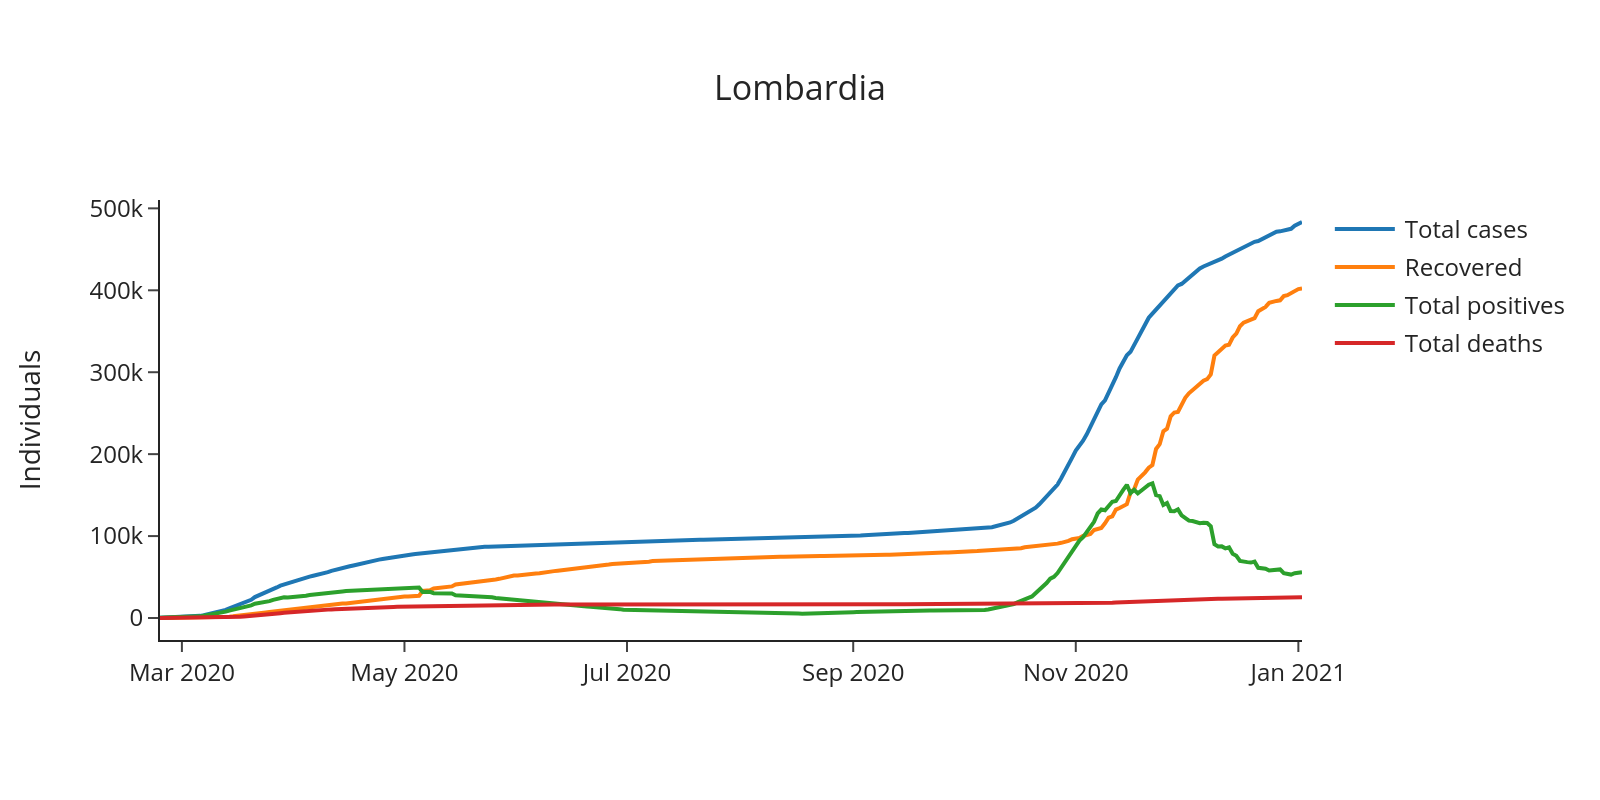

In [35]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_casi', 'dimessi_guariti', 'totale_positivi', 'deceduti'],
                    legend_titles=['Total cases', 'Recovered', 'Total positives', 'Total deaths'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Individuals',
                    output_image=True,
                    blend_legend=False)

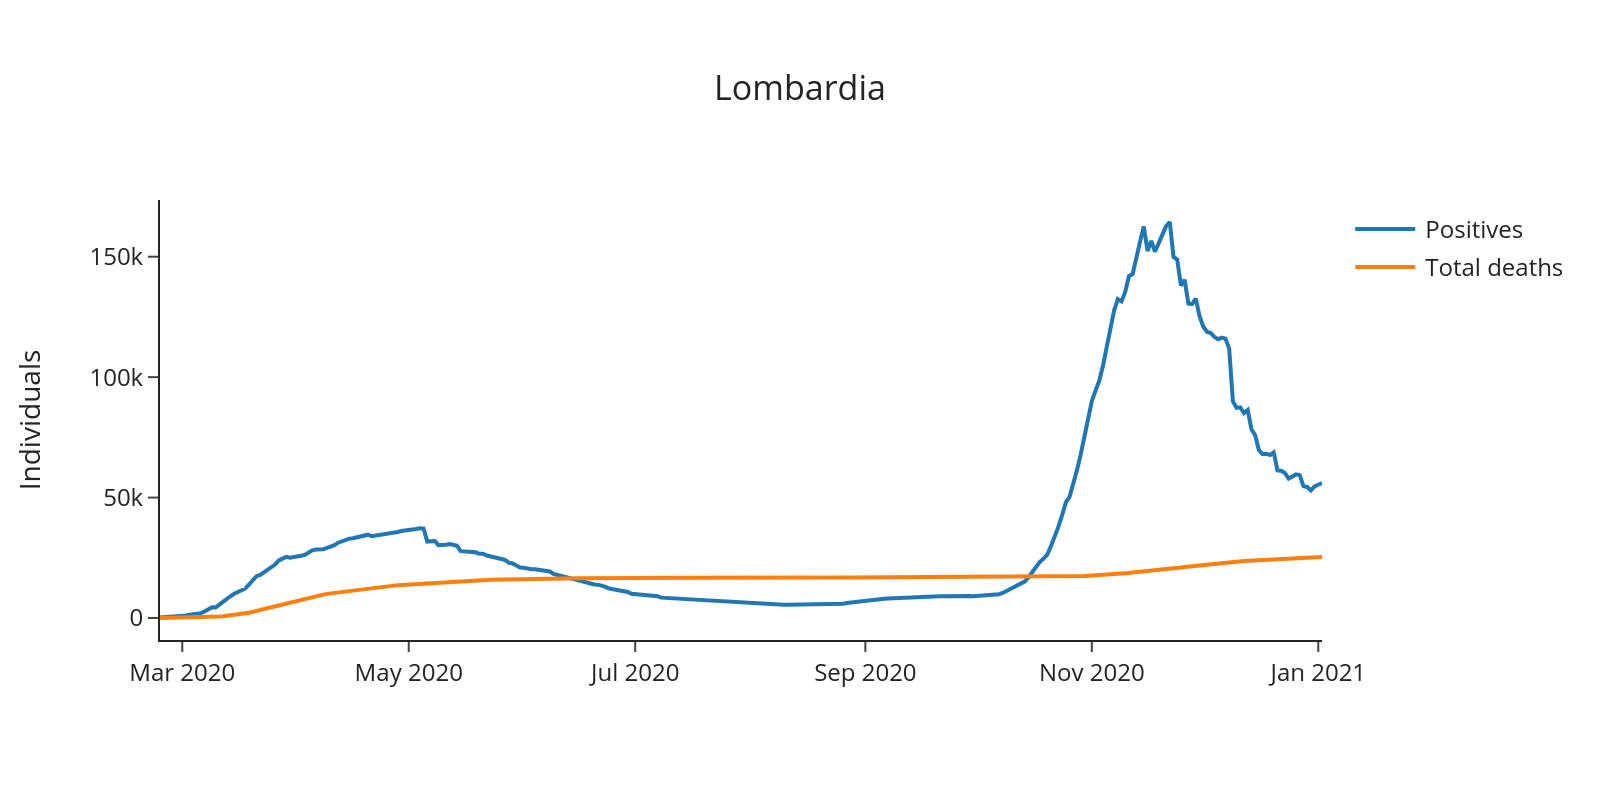

In [37]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_positivi', 'deceduti'],
                    legend_titles=['Positives', 'Total deaths'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Individuals',
                    output_image=True)

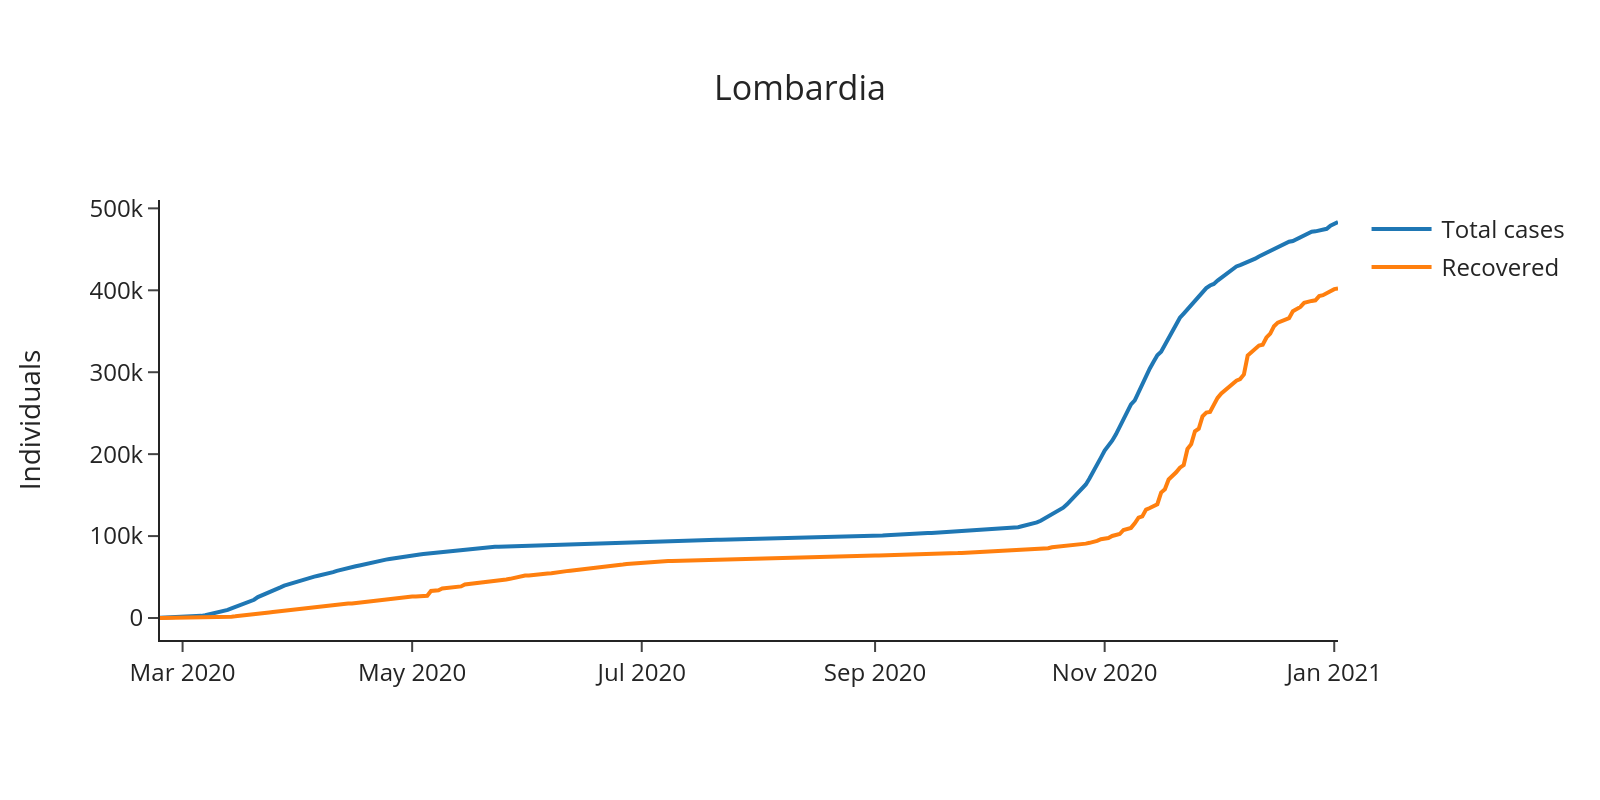

In [34]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_casi', 'dimessi_guariti'],
                    legend_titles=['Total cases', 'Recovered'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Individuals',
                    output_image=True,
                    blend_legend=False)

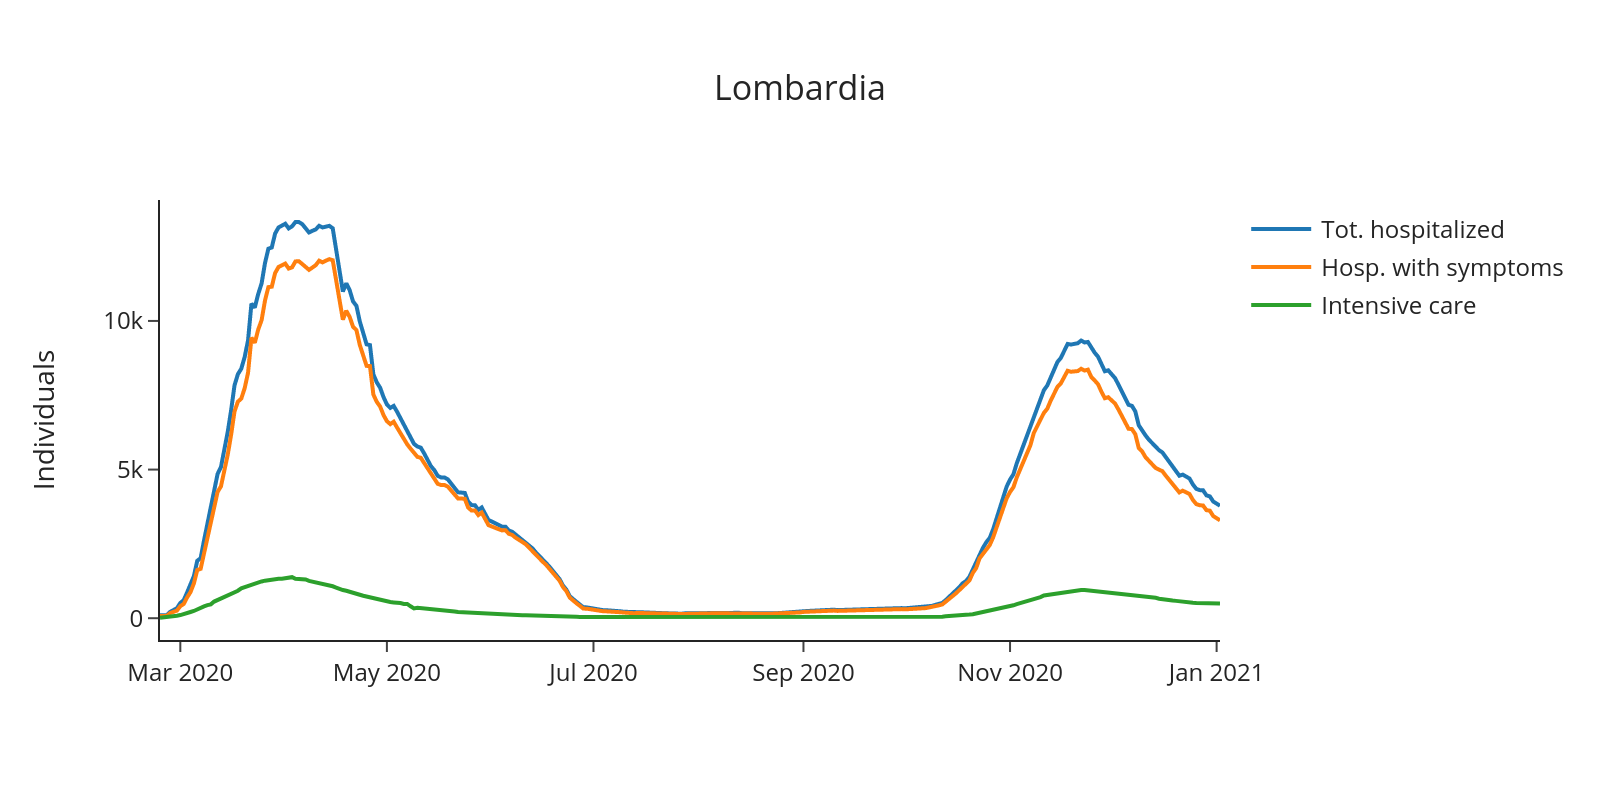

In [36]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva'],
                    legend_titles=['Tot. hospitalized', 'Hosp. with symptoms', 'Intensive care'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Individuals',
                    output_image=True,
                    blend_legend=False)

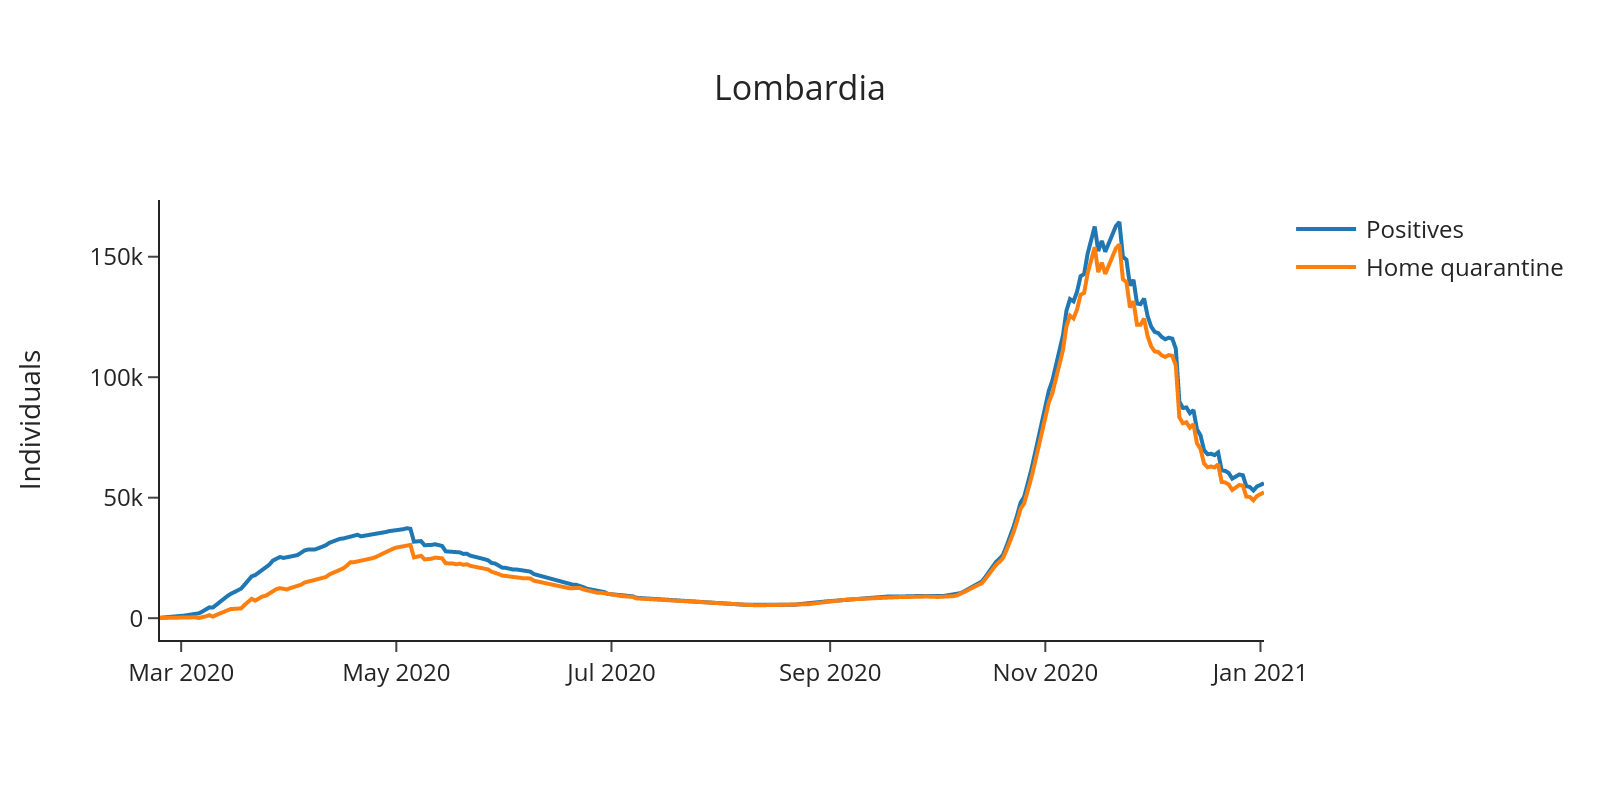

In [38]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_positivi', 'isolamento_domiciliare'],
                    legend_titles=['Positives', 'Home quarantine'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Individuals',
                    output_image=True,
                    blend_legend=False)

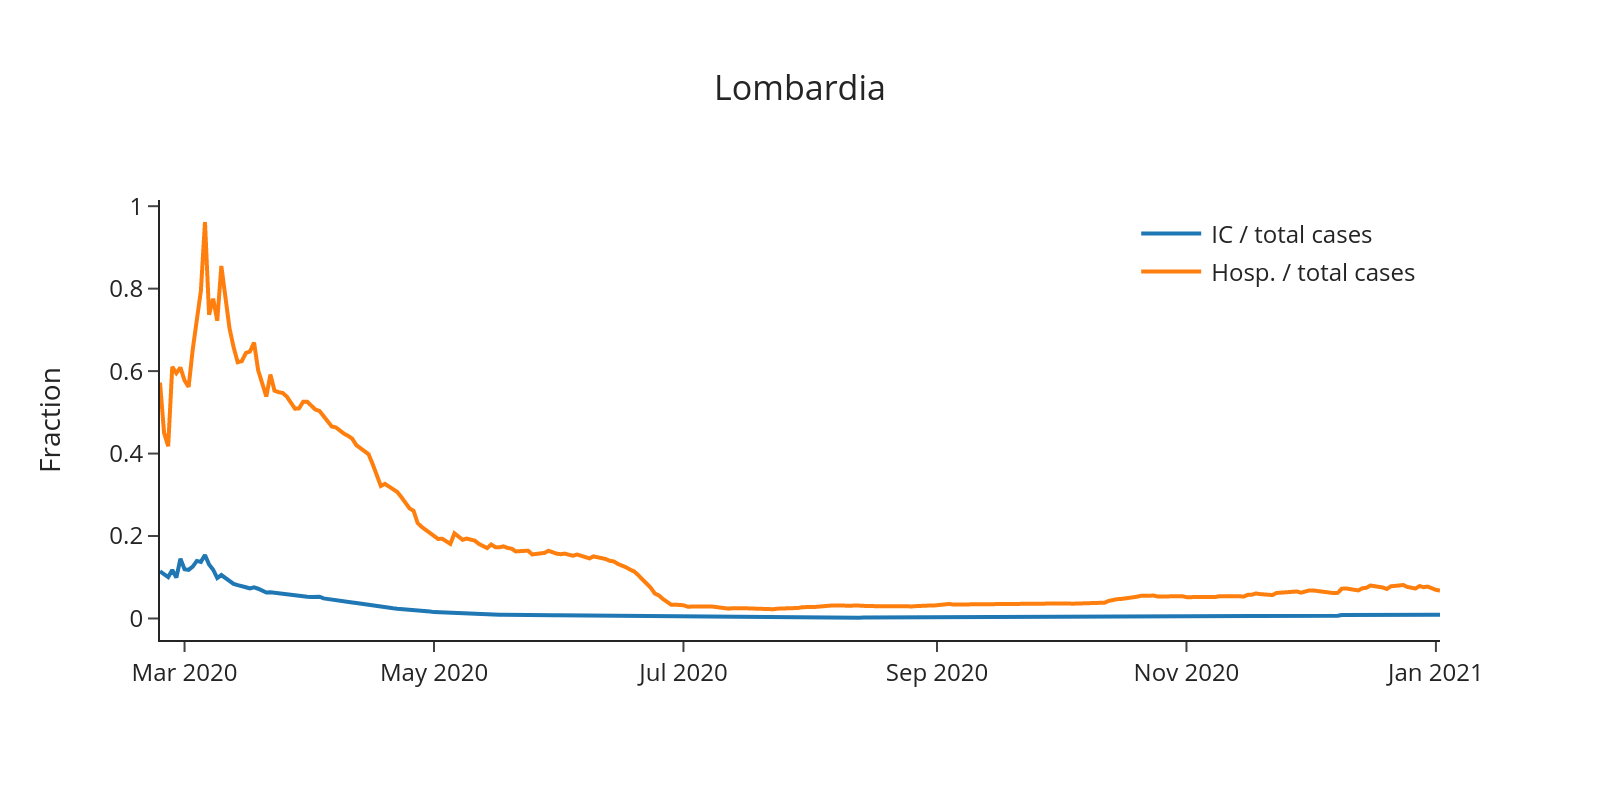

In [41]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['IC_R', 'Hosp_R'],
                    legend_titles=['IC / total cases', 'Hosp. / total cases'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Fraction',
                    output_image=True,
                    blend_legend=True)

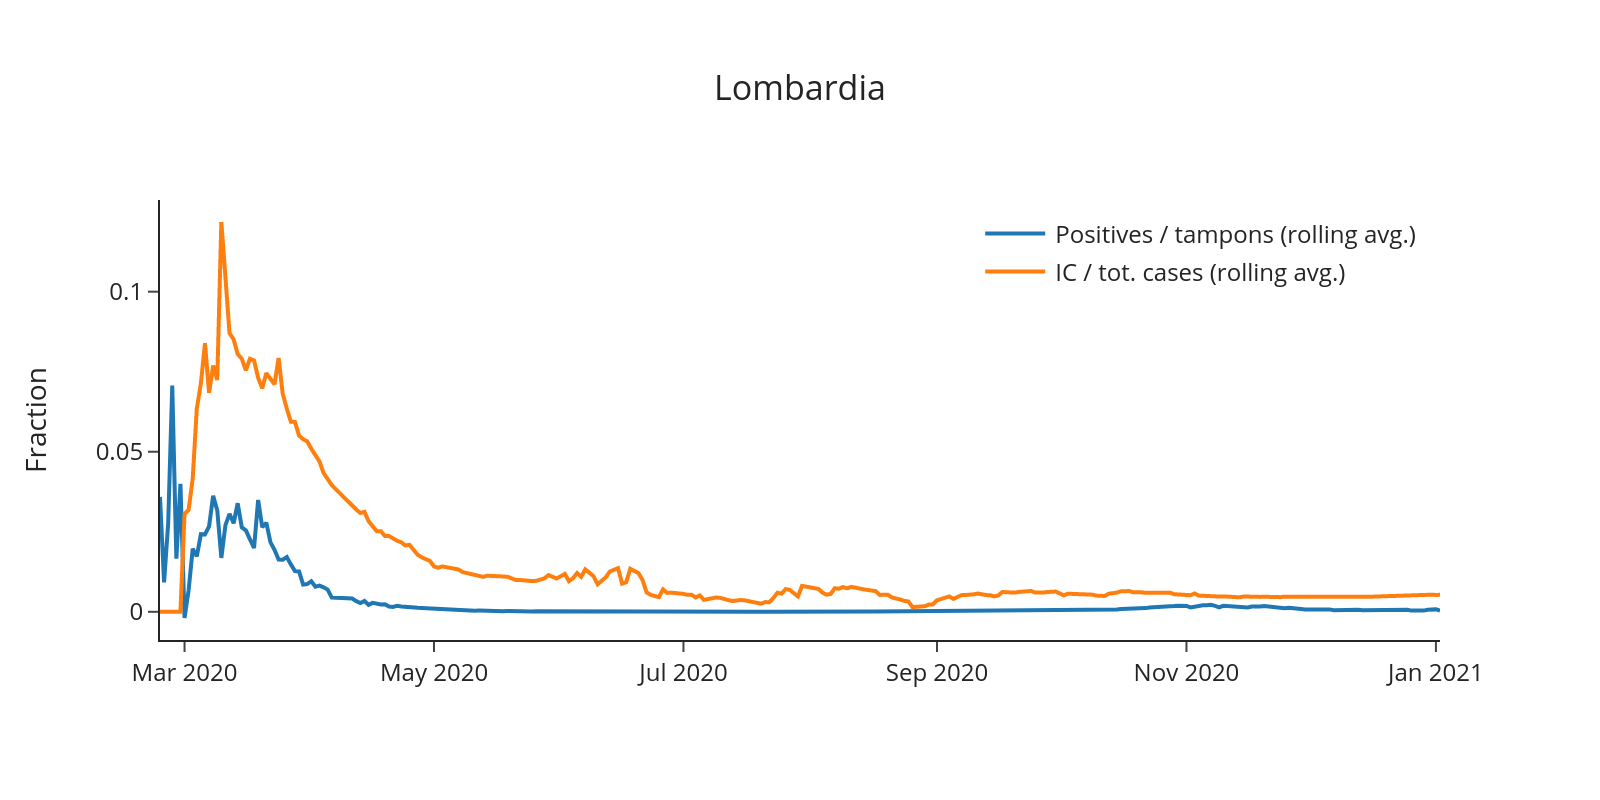

In [42]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R_Rolling', 'IC_R_Rolling'],
                    legend_titles=['Positives / tampons (rolling avg.)', 'IC / tot. cases (rolling avg.)'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Fraction',
                    output_image=True,
                    blend_legend=True)

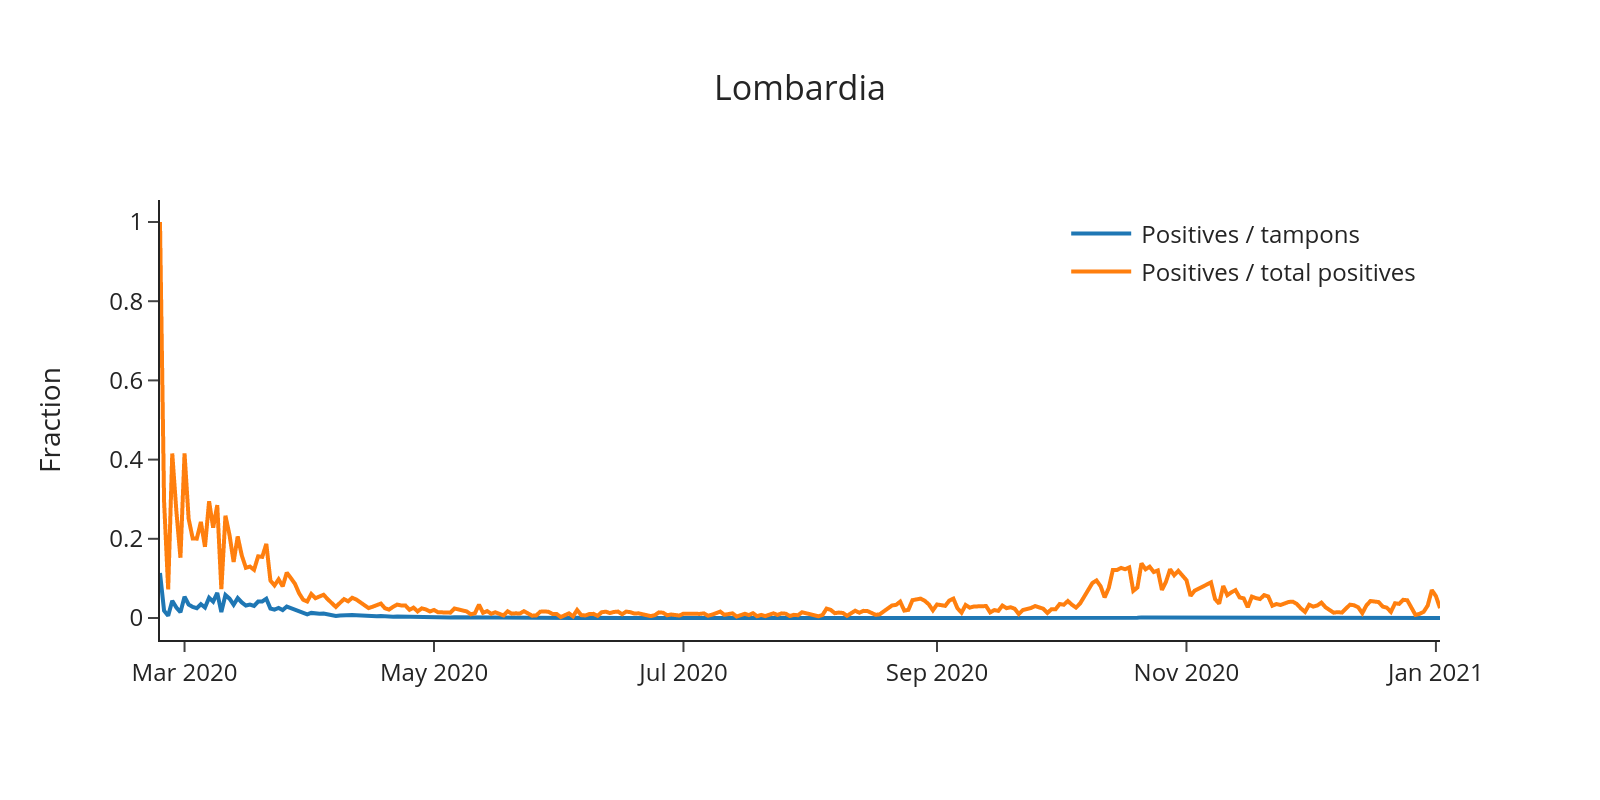

In [43]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R', 'NP_R'],
                    legend_titles=['Positives / tampons', 'Positives / total positives'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='',
                    xtitle='',
                    ytitle='Fraction',
                    output_image=True,
                    blend_legend=True)

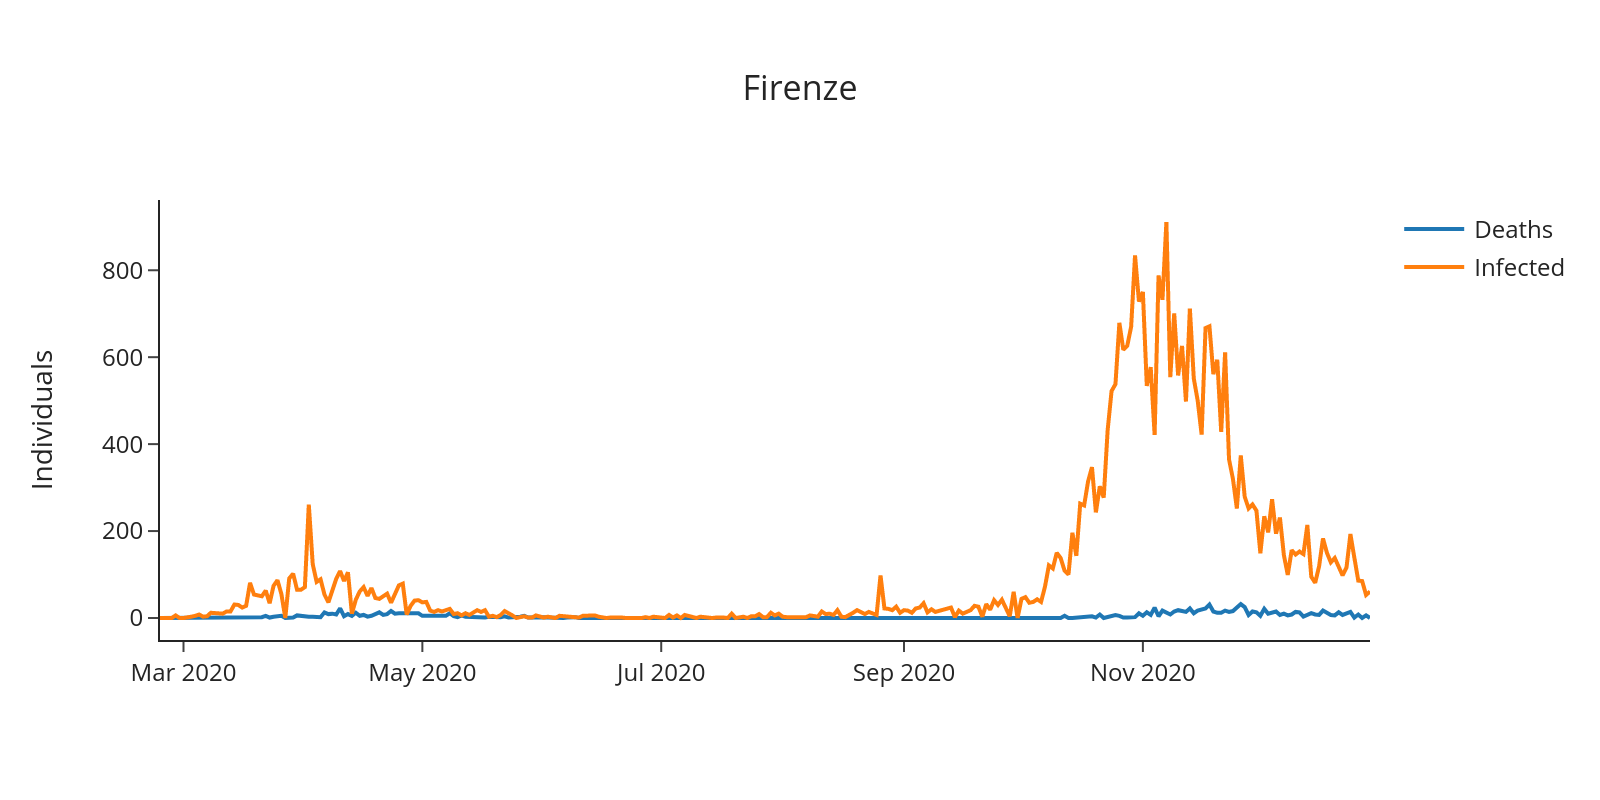

In [44]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Deaths', 'New_cases'],
                    legend_titles=['Deaths', 'Infected'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='',
                    xtitle='',
                    ytitle='Individuals',
                    output_image=True,
                    blend_legend=False)

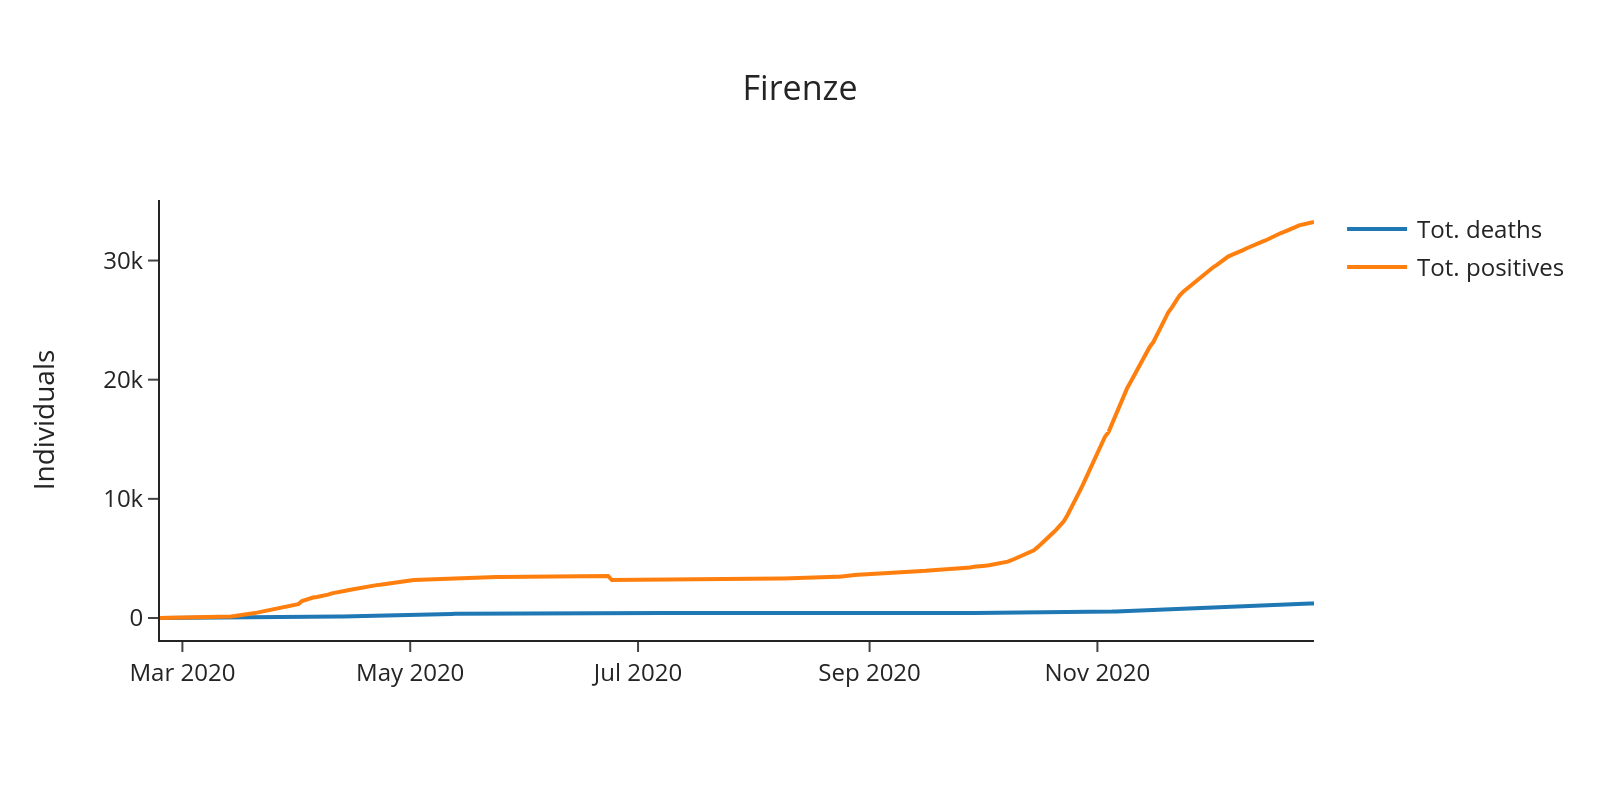

In [45]:
inter_dropdown_plot(options=covidpro_df.Province.unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Tot_deaths', 'Curr_pos_cases'],
                    legend_titles=['Tot. deaths', 'Tot. positives'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='',
                    xtitle='',
                    ytitle='Individuals',
                    output_image=True,
                    blend_legend=False)

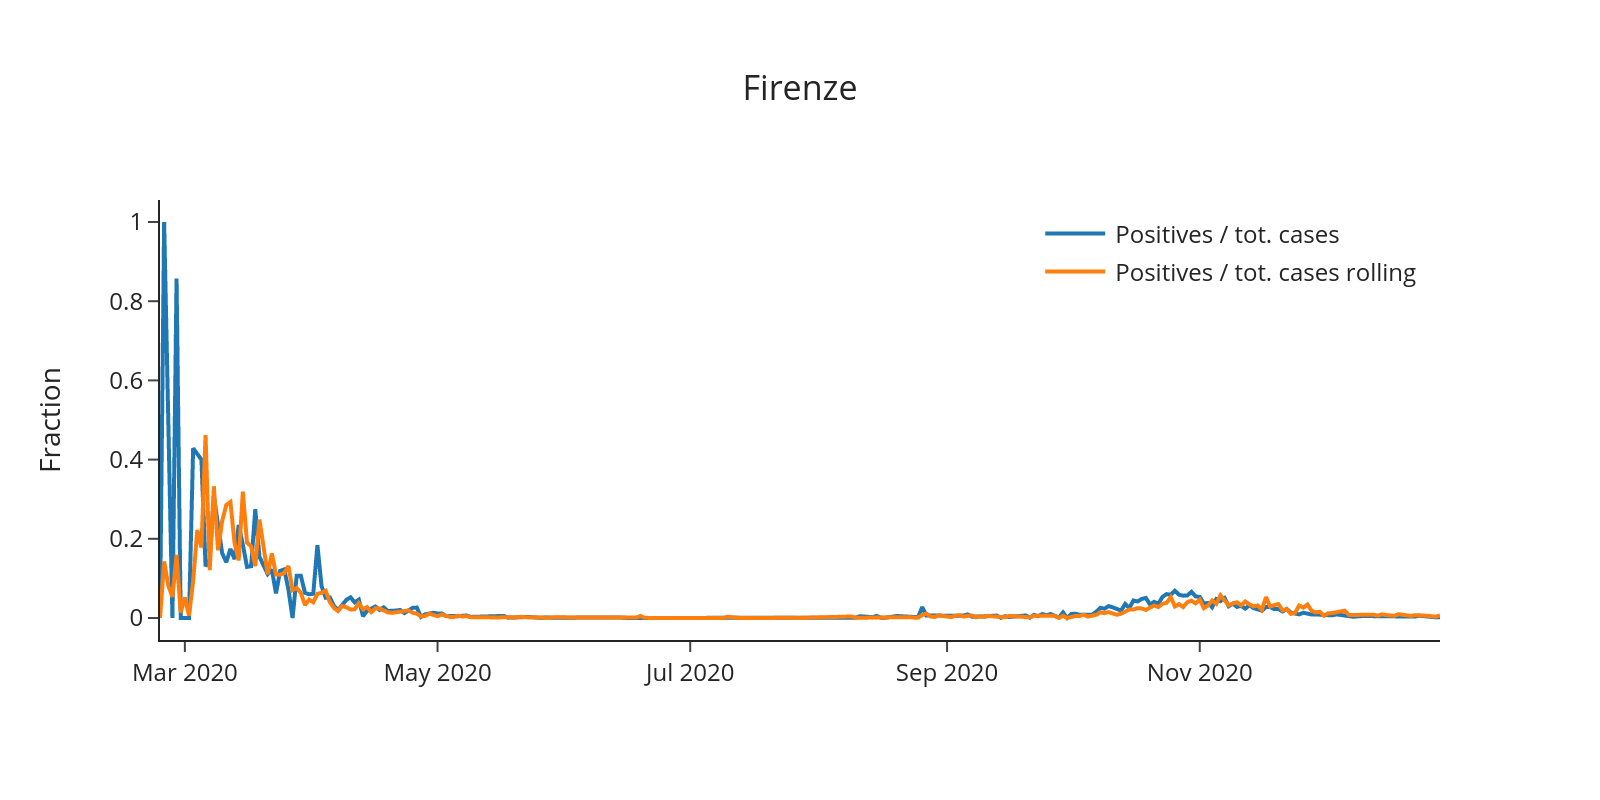

In [46]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['NP_R', 'NP_R_Rolling'],
                    legend_titles=['Positives / tot. cases', 'Positives / tot. cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='',
                    xtitle='',
                    ytitle='Fraction',
                    output_image=True,
                    blend_legend=True)

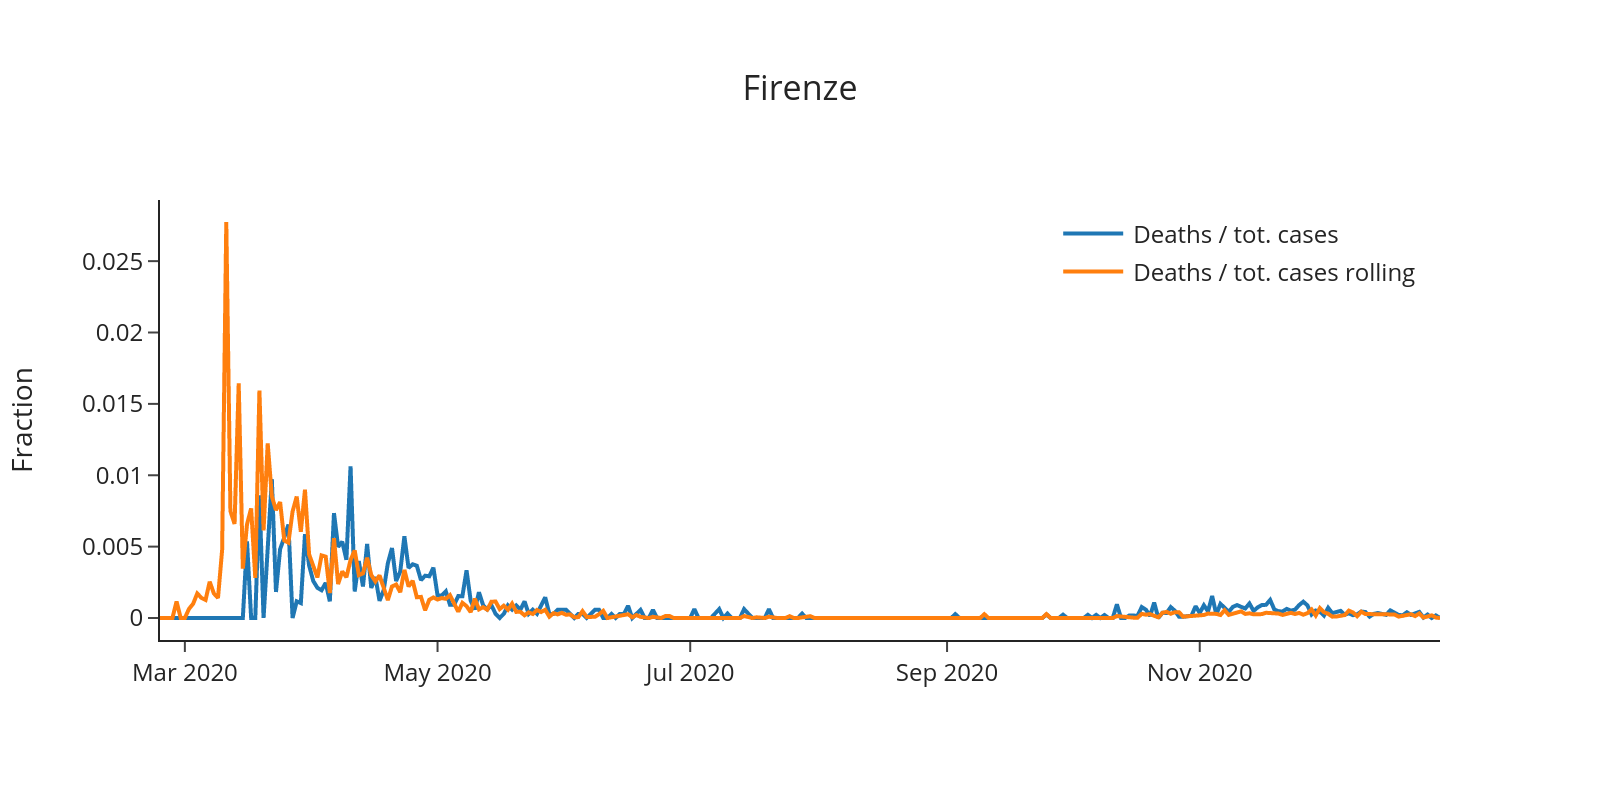

In [48]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['DR', 'DR_Rolling'],
                    legend_titles=['Deaths / tot. cases', 'Deaths / tot. cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='',
                    xtitle='',
                    ytitle='Fraction',
                    output_image=True,
                    blend_legend=True)

In [5]:
dpc_regioni_df['ricoverati_con_sintomi_giorno'] = dpc_regioni_df['ricoverati_con_sintomi'] - dpc_regioni_df['ricoverati_con_sintomi'].shift(1)
dpc_regioni_df['terapia_intensiva_giorno'] = dpc_regioni_df['terapia_intensiva'] - dpc_regioni_df['terapia_intensiva'].shift(1)
dpc_regioni_df['deceduti_giorno'] = dpc_regioni_df['deceduti'] - dpc_regioni_df['deceduti'].shift(1)
dpc_regioni_df['tamponi_giorno'] = dpc_regioni_df['tamponi'] - dpc_regioni_df['tamponi'].shift(1)
dpc_regioni_df['casi_testati_giorno'] = dpc_regioni_df['casi_testati'] - dpc_regioni_df['casi_testati'].shift(1)
dpc_regioni_df['dimessi_guariti_giorno'] = dpc_regioni_df['dimessi_guariti'] - dpc_regioni_df['dimessi_guariti'].shift(1)

In [103]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

regione = 'Piemonte'

dpc_regioni_firstw = dpc_regioni_df[dpc_regioni_df.denominazione_regione == regione].query("20200730 > data")

fig = make_subplots(rows=4, cols=2)

fig.add_trace(
    go.Bar(name='Hosp. with symptoms', x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['ricoverati_con_sintomi_giorno']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(name='Intensive care', x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['terapia_intensiva_giorno']),
    row=1, col=2
)
fig.add_trace(
    go.Bar(name='New positives', x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['nuovi_positivi']),
    row=2, col=1
)
fig.add_trace(
    go.Bar(name='Tampons', x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['tamponi_giorno']),
    row=2, col=2
)
fig.add_trace(
    go.Bar(name='Tested cases', x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['casi_testati_giorno']),
    row=3, col=1
)
fig.add_trace(
    go.Bar(name='Deaths', x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['deceduti_giorno']),
    row=3, col=2
)
fig.add_trace(
    go.Bar(name='Recovered', x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['dimessi_guariti_giorno']),
    row=4, col=1
)

fig.update_layout(height=800, width=800, title_text='Daily changes in the main indicators - ' + regione, template='plotly_white')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.2,
    xanchor="center",
    x=.5
))
fig.show()

In [104]:
days = 30
new_cases = \
  pd.DataFrame({'giorni': range(days),\
                'autocor_tamponi_eseguiti': \
                [dpc_regioni_firstw['tamponi_giorno'].corr(dpc_regioni_firstw['tamponi_giorno'].shift(i)) \
                            for i in range(days)], \
                'autocor_casi_testati': \
                [dpc_regioni_firstw['casi_testati_giorno'].corr(dpc_regioni_firstw['casi_testati_giorno'].shift(i)) \
                            for i in range(days)], \
                'autocor_nuovi_positivi': \
                [dpc_regioni_firstw['nuovi_positivi'].corr(dpc_regioni_firstw['nuovi_positivi'].shift(i)) \
                            for i in range(days)], \
                'autocor_nuovi_ricoverati': \
                [dpc_regioni_firstw['ricoverati_con_sintomi_giorno'].corr(dpc_regioni_firstw['ricoverati_con_sintomi_giorno'].shift(i)) \
                            for i in range(days)],\
                'autocor_nuove_TI': \
                [dpc_regioni_firstw['terapia_intensiva_giorno'].corr(dpc_regioni_firstw['terapia_intensiva_giorno'].shift(i)) \
                            for i in range(days)],\
                'autocor_nuovi_decessi': \
                [dpc_regioni_firstw['deceduti_giorno'].corr(dpc_regioni_firstw['deceduti_giorno'].shift(i)) \
                            for i in range(days)]
               })

fig = px.line(new_cases, \
              x='giorni', \
              y=['autocor_casi_testati','autocor_tamponi_eseguiti',\
                 'autocor_nuovi_positivi','autocor_nuovi_ricoverati','autocor_nuove_TI','autocor_nuovi_decessi'],\
              line_shape = 'spline',\
              title=f'Auto-correlazione su tamponi eseguiti / casi testati / '\
              'nuovi positivi / ricoverati / TI / decessi')
fig.add_vline(x = 7, line_dash='dash', line_color='green', \
              annotation_text='one<br>week', annotation_position='bottom right')
fig.add_vline(x = 14, line_dash='dash', line_color='green', \
              annotation_text='two<br>weeks', annotation_position='bottom right')
fig.update_yaxes(title_text='Auto-correlation')
fig.update_xaxes(title_text='Days')
fig.update_layout(width=950, template='plotly_white')
fig.show()

In [105]:
days = 130
cases_death_corr = \
  pd.DataFrame({'giorni': range(days),\
                'crosscor_decessi_nuovi_positivi': \
                    [dpc_regioni_firstw['deceduti_giorno'].rolling(7,center=True).mean()\
                     .corr(dpc_regioni_firstw['nuovi_positivi'].rolling(7,center=True).mean().shift(i))\
                     for i in range(days)], \
                'crosscor_decessi_nuovi_ricoverati': \
                    [dpc_regioni_firstw['deceduti_giorno'].rolling(7,center=True).mean()\
                     .corr(dpc_regioni_firstw['ricoverati_con_sintomi_giorno'].rolling(7,center=True).mean().shift(i))\
                     for i in range(days)], \
                'crosscor_decessi_nuove_TI': \
                    [dpc_regioni_firstw['deceduti_giorno'].rolling(7,center=True).mean()\
                     .corr(dpc_regioni_firstw['terapia_intensiva_giorno'].rolling(7,center=True).mean().shift(i))\
                     for i in range(days)]
               })
fig = px.line(cases_death_corr, \
              x='giorni', \
              y='crosscor_decessi_nuovi_positivi', \
              line_shape = 'spline', \
              title='Cross-correlation deaths - new cases (rolling avg. 7d)')
fig.update_yaxes(title_text='Cross-correlation')
fig.update_xaxes(title_text='Days')
fig.add_vline(x = cases_death_corr['crosscor_decessi_nuovi_positivi'].idxmax(),\
              line_dash='dash', line_color='green', \
              annotation_text='max<br>correl.', annotation_position='bottom right')
fig.update_layout(template='plotly_white')
fig.show()

In [91]:
giorni_max_cor = cases_death_corr['crosscor_decessi_nuovi_positivi'].idxmax()
valore_max_cor = round(cases_death_corr['crosscor_decessi_nuovi_positivi'].max(),4)

In [140]:
print(f'The highest correlation between deaths and new positives is after {giorni_max_cor} days')
print(f'It is equal to {valore_max_cor} on a theoretical maximum of 1 (perfect correlation)')

The highest correlation between deaths and new positives is after 93 days
It is equal to 0.9576 on a theoretical maximum of 1 (perfect correlation)


In [134]:
fig = make_subplots(specs=[[{'secondary_y': True}]])
fig.add_trace(
    go.Scatter(x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['nuovi_positivi'], \
               name='Positives', line_shape='spline'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['deceduti_giorno'].shift(-giorni_max_cor), \
               name='Deaths of ' + str(giorni_max_cor) + 'd after', line_shape='spline'),
    secondary_y=True,
)

fig.update_layout(
    title_text='Trend positives - deaths (shift of ' + str(giorni_max_cor) + 'd)'
)

fig.update_yaxes(title_text='Positives', secondary_y=False)
fig.update_yaxes(title_text='Deaths', secondary_y=True)
fig.update_layout(template='plotly_white')

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.2,
    xanchor="center",
    x=.5
))
fig.show()

In [111]:
days = 130
healing_corr = \
  pd.DataFrame({'giorni': range(days),\
                'healing_corr': \
                    [dpc_regioni_firstw['dimessi_guariti_giorno'].rolling(7,center=True).mean().\
                     corr(dpc_regioni_firstw['nuovi_positivi'].rolling(7,center=True).mean().shift(i))\
                     for i in range(days)]
               })
fig = px.line(healing_corr, \
              x='giorni', \
              y='healing_corr', \
              line_shape = 'spline', \
              title='Cross-correlation discharged - hosp. with symptoms (rolling avg. 7d)')
fig.update_yaxes(title_text='Cross-correlation')
fig.update_xaxes(title_text='Days')
fig.add_vline(x = healing_corr['healing_corr'].idxmax(),\
              line_dash='dash', line_color='green', \
              annotation_text='max<br>corr.', annotation_position='bottom right')
fig.update_layout(template='plotly_white')
fig.show()

In [139]:
giorni_max_cor_healing = healing_corr['healing_corr'].idxmax()
valore_max_cor_healing = round(healing_corr['healing_corr'].max(),4)
print(f'The highest correlation between recovered and new positives is after {giorni_max_cor_healing} days')
print(f'It is equal to {valore_max_cor_healing} on a theoretical maximum of 1 (perfect correlation)')

The highest correlation between recovered and new positives is after 93 days
It is equal to 0.9558 on a theoretical maximum of 1 (perfect correlation)


In [137]:
fig = make_subplots(specs=[[{'secondary_y': True}]])
fig.add_trace(
    go.Scatter(x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['nuovi_positivi'], \
               name='Positives', line_shape='spline'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=dpc_regioni_firstw['data'], y=dpc_regioni_firstw['dimessi_guariti_giorno'].shift(-giorni_max_cor_healing), \
               name='Discharged and recovered/discharged ' + str(giorni_max_cor_healing) + 'd after', line_shape='spline'),
    secondary_y=True,
)

fig.update_layout(
    title_text='Trend positives - recovered/discharged (shift of ' + str(giorni_max_cor_healing) + 'd)'
)

fig.update_yaxes(title_text='Positives', secondary_y=False)
fig.update_yaxes(title_text='Dischar. and recov./dischar.', secondary_y=True)
fig.update_layout(template='plotly_white')

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.2,
    xanchor="center",
    x=.5
))
fig.show()